<a href="https://colab.research.google.com/github/sirjit2/AIclass/blob/main/Workshop2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/AI/Titanic-Dataset.csv")
subset = df[['Name','Pclass','Sex','Age','Fare','Survived']]
first_class = subset[subset['Pclass'] == 1]

mean_fare = first_class['Fare'].mean()
median_fare = first_class['Fare'].median()
max_fare = first_class['Fare'].max()
min_fare = first_class['Fare'].min()

mean_fare, median_fare, max_fare, min_fare


(np.float64(84.1546875), 60.287499999999994, 512.3292, 0.0)

In [11]:
null_count = first_class['Age'].isnull().sum()
first_class_clean = first_class.dropna(subset=['Age'])
null_count


np.int64(30)

In [5]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/AI/Titanic-Dataset.csv")

encoded = pd.get_dummies(df["Embarked"], prefix="Embarked")

df = pd.concat([df, encoded], axis=1)

df = df.drop("Embarked", axis=1)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


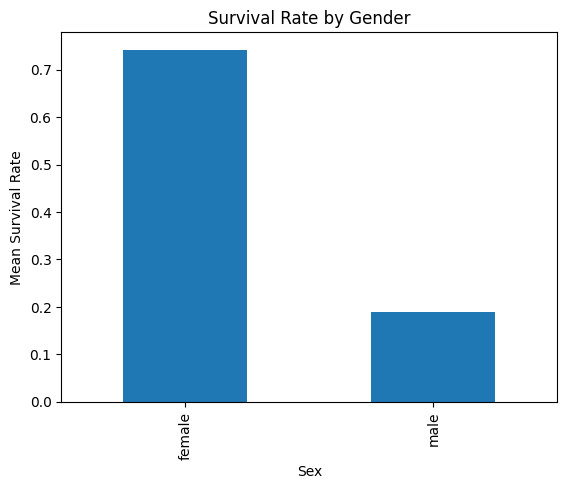

,Survived
Sex,
female,0.742038
male,0.188908


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_csv("/content/drive/MyDrive/AI/Titanic-Dataset.csv")
means = titanic.groupby("Sex")["Survived"].mean()

means.plot(kind="bar")
plt.xlabel("Sex")
plt.ylabel("Mean Survival Rate")
plt.title("Survival Rate by Gender")
plt.show()

means


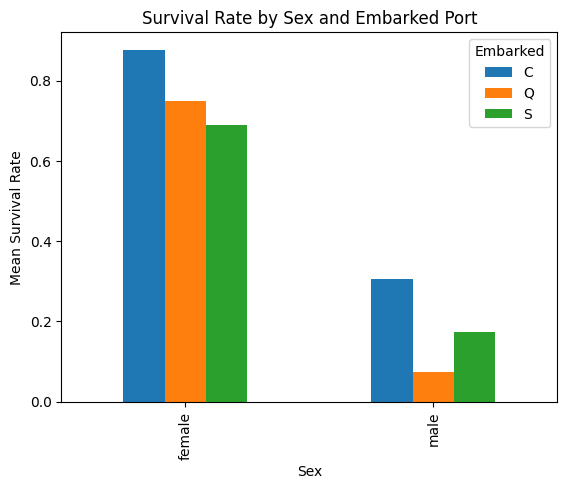

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/AI/Titanic-Dataset.csv")

pivot = df.pivot_table(values="Survived", index="Sex", columns="Embarked")

pivot[['C','Q','S']].plot(kind="bar")
plt.xlabel("Sex")
plt.ylabel("Mean Survival Rate")
plt.title("Survival Rate by Sex and Embarked Port")
plt.show()


/tmp/ipython-input-1619477783.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  table = df.pivot_table(values="Survived", index="Pclass", columns="AgeGroup")


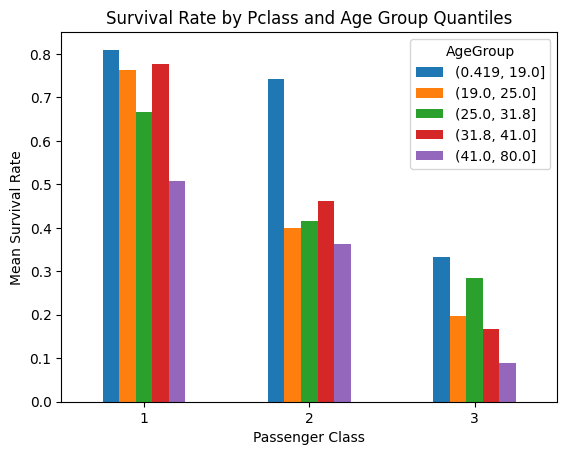

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/AI/Titanic-Dataset.csv")

df["AgeGroup"] = pd.qcut(df["Age"], q=5)

table = df.pivot_table(values="Survived", index="Pclass", columns="AgeGroup")

table.plot(kind="bar")
plt.xlabel("Passenger Class")
plt.ylabel("Mean Survival Rate")
plt.title("Survival Rate by Pclass and Age Group Quantiles")
plt.xticks(rotation=0)
plt.show()
